In [2]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
import scipy
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
import pickle
from random import sample
from matplotlib_venn import venn2

### Load Data

In [3]:
CM_Cells = sc.read_h5ad('./Knockout_CM_DF.h5ad')

### Plot PHATE

In [5]:
query_region = '0'
Cluster_0 = []
for bc in CM_Cells.obs.index:
    if CM_Cells.obs.louvain[bc] == query_region:
        Cluster_0.append(1)
    else:
        Cluster_0.append(0)

In [6]:
query_region = '1'
Cluster_1 = []
for bc in CM_Cells.obs.index:
    if CM_Cells.obs.louvain[bc] == query_region:
        Cluster_1.append(1)
    else:
        Cluster_1.append(0)

In [7]:
query_region = '2'
Cluster_2 = []
for bc in CM_Cells.obs.index:
    if CM_Cells.obs.louvain[bc] == query_region:
        Cluster_2.append(1)
    else:
        Cluster_2.append(0)

In [8]:
query_region = '3'
Cluster_3 = []
for bc in CM_Cells.obs.index:
    if CM_Cells.obs.louvain[bc] == query_region:
        Cluster_3.append(1)
    else:
        Cluster_3.append(0)

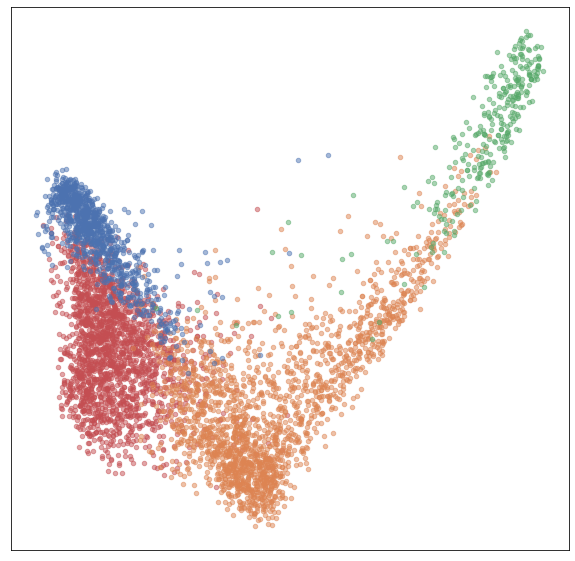

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

indices = np.nonzero(Cluster_0)[0]
x = CM_Cells.obsm['X_phate'][indices,0]
y = CM_Cells.obsm['X_phate'][indices,1]
ax.scatter(x,
           y, 
           c='#c44e52',
           s=20,
        alpha=0.5)

indices = np.nonzero(Cluster_1)[0]
x = CM_Cells.obsm['X_phate'][indices,0]
y = CM_Cells.obsm['X_phate'][indices,1]
ax.scatter(x, 
           y, 
           c='#dd8452',
           s=20,
        alpha=0.5)

indices = np.nonzero(Cluster_2)[0]
x = CM_Cells.obsm['X_phate'][indices,0]
y = CM_Cells.obsm['X_phate'][indices,1]
ax.scatter(x, 
           y, 
           c='#4c72b0',
           s=20,
        alpha=0.5)

indices = np.nonzero(Cluster_3)[0]
x = CM_Cells.obsm['X_phate'][indices,0]
y = CM_Cells.obsm['X_phate'][indices,1]
ax.scatter(x, 
           y, 
           c='#55a868',
           s=20,
        alpha=0.5)
                     
                     
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticks([])

ax.grid(False)

plt.savefig('./CM_PHATE_Clustering.png', dpi =600)

### Plot PHATE Pseudo

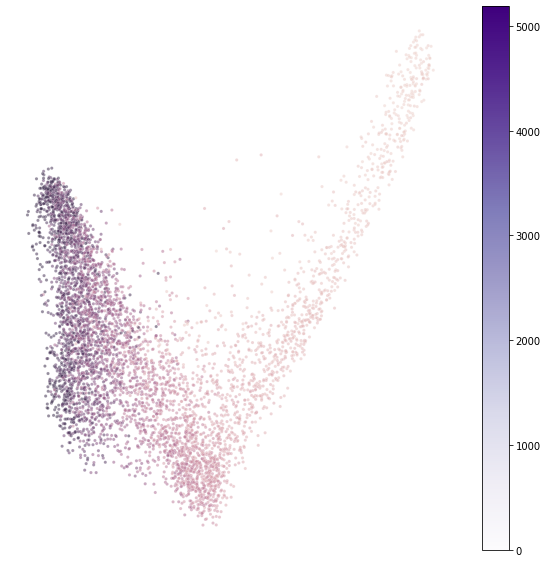

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = CM_Cells.obsm['X_phate'][:,0], y = CM_Cells.obsm['X_phate'][:,1], hue = CM_Cells.obs.rank_pseudotime, s=10, alpha=0.5)

norm = plt.Normalize(CM_Cells.obs.rank_pseudotime.min(), CM_Cells.obs.rank_pseudotime.max())
sm = plt.cm.ScalarMappable(cmap='Purples', norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)



plt.axis('off')
ax.grid(False)
fig.savefig('./CM_PHATE_pseudo.png', dpi= 600)

### Plot PHATE Genes

In [27]:
%%capture
Target  = 'IRX2'
Target_Expression = []
[Target_Expression.append(i[0]) for i in CM_Cells.raw.X[:,np.argwhere(CM_Cells.raw.var_names == Target)[0][0]].todense().tolist()]
CM_Cells.obs['Target'] = Target_Expression/np.log(2)

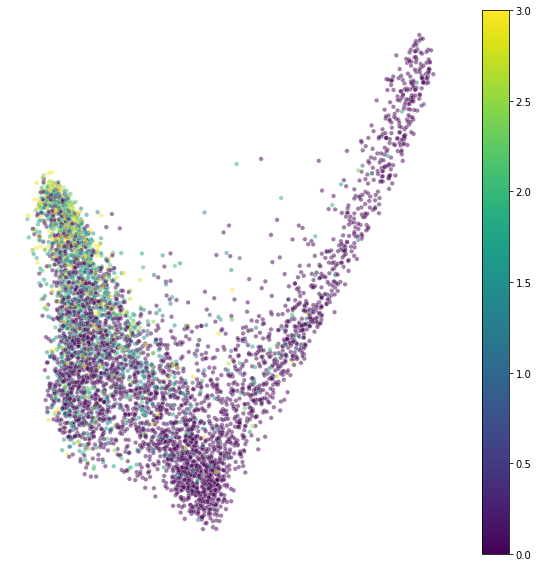

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = CM_Cells.obsm['X_phate'][:,0], y = CM_Cells.obsm['X_phate'][:,1], hue = CM_Cells.obs.Target, s=20, alpha=0.5, palette='viridis', hue_norm=(0, 2))
norm = plt.Normalize(CM_Cells.obs.Target.min(), 3)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])


# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)



plt.axis('off')
ax.grid(False)
fig.savefig('./CM_PHATE_' + Target + '.png', dpi =600)